In [3]:
import pandas_datareader.data as web

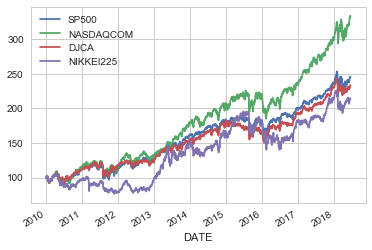

In [4]:
symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()
plt.show()

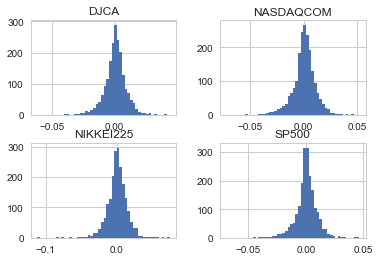

In [5]:
# 주식의 수익률은 보통 정규분포를 따른다!!
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

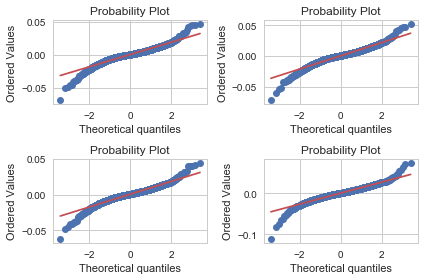

In [7]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show() 
# 아래와 같은 모양이 fat tail = long tail : 정규분포의 양 끝이 뚱뚱하고 두꺼운 모양새

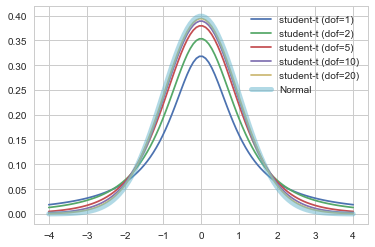

In [8]:
# 자유도 (아래코드에선 df(degree of freedom)를 의미)
# 자유도가 커지면 분산이 점차 줄어들면서 정규분포에 가까워진다.
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=("student-t (dof=%d)" % df))
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.legend()
plt.show()

#### student - t 분포
- 샘플의 수가 유한한 경우에 샘플표준편차를 이용하여 샘플평균을 정규화 한 것이다.

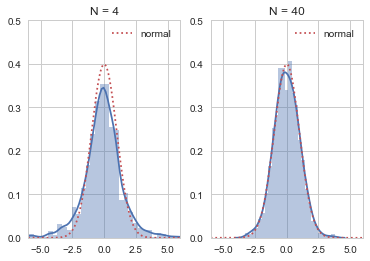

In [9]:
# 이 또한 N의 값이 커지면 정규분포에 가까워진다.
np.random.seed(0)

rv = sp.stats.norm()
M = 1000

plt.subplot(1, 2, 1)
N = 4
x1 = rv.rvs((N, M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="normal")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("N = 4")
plt.legend()

plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="normal")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("N = 40")
plt.legend()

plt.show()